In [13]:
import numpy as np
import pandas as pd
df = pd.read_csv('real_final.csv')

In [14]:
df.columns

Index(['Unnamed: 0', 'Date', 'Piligrims', 'Tonsures', 'Hundi', 'Tirupati',
       'Tirumala', 'VIP darshan', 'tirumala darshan', 'srinivasam complex',
       'tirumala darshan tickets', 'tirupati balaji.ap.gov.in', 'condition',
       'temperature', 'Timestamp', 'weekday', 'festival_count',
       'festival_impact', 'is_normal',
       'is_Nagulapuram Sri Vedanarayanaswamivari Brahmotsavam',
       'is_Devuni Kadapa Sri Lakshmi Venkateswaraswamivari Brahmotsavams',
       'days_until_next_festival', 'days_since_last_festival'],
      dtype='object')

##IMPORING THE UNPREPROCESSED DATA

In [15]:
import numpy as np
import pandas as pd
df2 = pd.read_csv('encoded_conditions.csv',encoding='latin1')

In [16]:
df2

,Unnamed: 0,Date,Piligrims,Tonsures,Hundi,Tirupati,Tirumala,VIP darshan,tirumala darshan,srinivasam complex,tirupati balaji.ap.gov.in,temperature,weekday,conditions,Special_day,condition_encoded
0,0,01-01-2022,36560,14084.0,2.15,43,23,16,9,0,0,71.60,1,Light drizzle,New Years Day,3
1,1,02-01-2022,38894,12270.0,3.93,41,25,14,9,0,0,74.84,1,Overcast,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano...",8
2,2,03-01-2022,31776,16046.0,2.69,40,19,0,5,0,7,73.22,0,Moderate drizzle,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam",6
3,3,04-01-2022,31523,14692.0,2.45,45,17,22,16,0,0,73.76,0,Overcast,Amavasya,8
4,4,05-01-2022,32044,17558.0,2.61,32,14,21,10,0,7,73.94,0,Overcast,May Day,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1091,27-12-2024,66715,24503.0,4.06,79,55,0,39,0,0,70.88,0,Moderate rain,normal,7
1092,1092,28-12-2024,78414,26100.0,3.45,76,50,0,28,0,0,76.46,1,Overcast,normal,8
1093,1093,29-12-2024,84950,21098.0,3.80,64,42,0,23,0,0,76.28,1,Overcast,normal,8
1094,1094,30-12-2024,68298,16544.0,4.10,68,42,0,26,0,0,74.66,0,Light drizzle,"Adhyanotsavam Begins in Tirumala , Amavasya",3


In [45]:
df.loc[1059]['Special_day']='christmas'

<ipython-input-45-2692292597ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[1059]['Special_day']='christmas'
<ipython-input-45-2692292597ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[1059]['Special_day']='christmas'


In [47]:
df[df.index.isin([358,723, 1059])]

,Unnamed: 0,Date,Piligrims,Tonsures,Hundi,Tirupati,Tirumala,VIP darshan,tirumala darshan,srinivasam complex,...,temperature,Timestamp,weekday,festival_count,festival_impact,is_normal,is_Nagulapuram Sri Vedanarayanaswamivari Brahmotsavam,is_Devuni Kadapa Sri Lakshmi Venkateswaraswamivari Brahmotsavams,days_until_next_festival,days_since_last_festival
358,358,2022-12-25,70373,32954,5.05,81,69,12,37,19,...,69.98,1.671907e+09,1,1,69929.862226,0,0,0,1.0,1.0
723,723,2023-12-25,69294,23837,4.10,100,100,12,96,100,...,75.02,1.703443e+09,0,1,66803.862226,0,0,0,1.0,1.0
1059,1059,2024-11-25,63637,24016,4.20,69,72,73,41,100,...,77.36,1.732473e+09,0,1,66803.862226,0,0,0,1.0,1.0


##DATA PREPROCESSING

In [6]:
import numpy as np
import pandas as pd
df1 = pd.read_csv('enhanced_data.csv')

In [18]:
df2 = df2.loc[:, ~df2.columns.str.contains("^Unnamed")]


In [8]:
df1

,Date,Piligrims,Tonsures,Hundi,Special Day,Tirupati,Tirumala,VIP darshan,tirumala darshan,srinivasam complex,tirumala darshan tickets,tirupati balaji.ap.gov.in,Special Day Weighted,Piligrims_7Day_Avg,Festival Intensity
0,01-01-2022,36560,14084.0,2.15,1,43,23,16,9,0,0,0,1.033614,36560.000000,36560.000000
1,02-01-2022,38894,12270.0,3.93,1,41,25,14,9,0,0,0,1.033614,37727.000000,37727.000000
2,03-01-2022,31776,16046.0,2.69,0,40,19,0,5,0,0,7,1.000000,35743.333333,0.000000
3,04-01-2022,31523,14692.0,2.45,0,45,17,22,16,0,0,0,1.000000,34688.250000,0.000000
4,05-01-2022,32044,17558.0,2.61,0,32,14,21,10,0,18,7,1.000000,34159.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,27-12-2024,66715,24503.0,4.06,1,79,55,0,39,0,27,0,1.033614,68876.571429,68876.571429
1092,28-12-2024,78414,26100.0,3.45,1,76,50,0,28,0,25,0,1.033614,69734.142857,69734.142857
1093,29-12-2024,84950,21098.0,3.80,1,64,42,0,23,0,0,0,1.033614,70832.714286,70832.714286
1094,30-12-2024,68298,16544.0,4.10,1,68,42,0,26,0,0,0,1.033614,71210.142857,71210.142857


In [19]:
df2[['holidays','holidays_new']] = df1[['Special Day','Piligrims_7Day_Avg']]  # Add column 'B' from df1 to df2

In [20]:
df2[['Timestamp']] = df[['Timestamp']]  # Add column 'B' from df1 to df2

In [21]:
df2

,Date,Piligrims,Tonsures,Hundi,Tirupati,Tirumala,VIP darshan,tirumala darshan,srinivasam complex,tirupati balaji.ap.gov.in,temperature,weekday,conditions,Special_day,condition_encoded,holidays,holidays_new,Timestamp
0,01-01-2022,36560,14084.0,2.15,43,23,16,9,0,0,71.60,1,Light drizzle,New Years Day,3,1,36560.000000,1.640975e+09
1,02-01-2022,38894,12270.0,3.93,41,25,14,9,0,0,74.84,1,Overcast,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano...",8,1,37727.000000,1.641062e+09
2,03-01-2022,31776,16046.0,2.69,40,19,0,5,0,7,73.22,0,Moderate drizzle,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam",6,0,35743.333333,1.641148e+09
3,04-01-2022,31523,14692.0,2.45,45,17,22,16,0,0,73.76,0,Overcast,Amavasya,8,0,34688.250000,1.641235e+09
4,05-01-2022,32044,17558.0,2.61,32,14,21,10,0,7,73.94,0,Overcast,May Day,8,0,34159.400000,1.641321e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,27-12-2024,66715,24503.0,4.06,79,55,0,39,0,0,70.88,0,Moderate rain,normal,7,1,68876.571429,1.735238e+09
1092,28-12-2024,78414,26100.0,3.45,76,50,0,28,0,0,76.46,1,Overcast,normal,8,1,69734.142857,1.735324e+09
1093,29-12-2024,84950,21098.0,3.80,64,42,0,23,0,0,76.28,1,Overcast,normal,8,1,70832.714286,1.735411e+09
1094,30-12-2024,68298,16544.0,4.10,68,42,0,26,0,0,74.66,0,Light drizzle,"Adhyanotsavam Begins in Tirumala , Amavasya",3,1,71210.142857,1.735497e+09


In [22]:
df2['Special Day'] = df2['Special_day'].fillna('Normal')


In [23]:
df2

,Date,Piligrims,Tonsures,Hundi,Tirupati,Tirumala,VIP darshan,tirumala darshan,srinivasam complex,tirupati balaji.ap.gov.in,temperature,weekday,conditions,Special_day,condition_encoded,holidays,holidays_new,Timestamp,Special Day
0,01-01-2022,36560,14084.0,2.15,43,23,16,9,0,0,71.60,1,Light drizzle,New Years Day,3,1,36560.000000,1.640975e+09,New Years Day
1,02-01-2022,38894,12270.0,3.93,41,25,14,9,0,0,74.84,1,Overcast,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano...",8,1,37727.000000,1.641062e+09,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano..."
2,03-01-2022,31776,16046.0,2.69,40,19,0,5,0,7,73.22,0,Moderate drizzle,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam",6,0,35743.333333,1.641148e+09,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam"
3,04-01-2022,31523,14692.0,2.45,45,17,22,16,0,0,73.76,0,Overcast,Amavasya,8,0,34688.250000,1.641235e+09,Amavasya
4,05-01-2022,32044,17558.0,2.61,32,14,21,10,0,7,73.94,0,Overcast,May Day,8,0,34159.400000,1.641321e+09,May Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,27-12-2024,66715,24503.0,4.06,79,55,0,39,0,0,70.88,0,Moderate rain,normal,7,1,68876.571429,1.735238e+09,normal
1092,28-12-2024,78414,26100.0,3.45,76,50,0,28,0,0,76.46,1,Overcast,normal,8,1,69734.142857,1.735324e+09,normal
1093,29-12-2024,84950,21098.0,3.80,64,42,0,23,0,0,76.28,1,Overcast,normal,8,1,70832.714286,1.735411e+09,normal
1094,30-12-2024,68298,16544.0,4.10,68,42,0,26,0,0,74.66,0,Light drizzle,"Adhyanotsavam Begins in Tirumala , Amavasya",3,1,71210.142857,1.735497e+09,"Adhyanotsavam Begins in Tirumala , Amavasya"


In [ ]:
df2.drop(columns=['Special_day'], inplace=True)


##DATA ENCODING


In [ ]:
df2['Special Day'] = df2['Special Day'].str.lower().str.strip()

In [24]:
def enhance_festival_features(df):
    # Handle multiple festivals in 'special_days' (comma-separated)
    df2['festival_count'] = df2['Special Day'].str.count(',') + 1
    df2['festival_count'] = df2['festival_count'].where(df2['Special Day'] != 'None', 0)

    # Target Encoding with Exponential Smoothing
    festival_means = df2[df2['Special Day'] != 'None'].groupby('Special Day')['Piligrims'].mean()
    global_mean = df2['Piligrims'].mean()
    #festival_df = pd.DataFrame(festival_means, columns =['Special Day', 'Piligrims'])
    festival_means.columns = ['Special Day', 'Average Piligrims']
    print(global_mean)
    df2['festival_impact'] = df2['Special Day'].map(festival_means).fillna(0)

    # Apply smoothing: weighted average between festival mean and global mean
    smoothing_factor = 0.2  # More weight to festival mean when data is sufficient
    df2['festival_impact'] = (df2['festival_impact'] * (1-smoothing_factor) +
                            global_mean * smoothing_factor)
    return df, festival_means, global_mean

df2, festival_df, global_mean= enhance_festival_features(df2)

68157.31113138686


In [25]:
df2

,Date,Piligrims,Tonsures,Hundi,Tirupati,Tirumala,VIP darshan,tirumala darshan,srinivasam complex,tirupati balaji.ap.gov.in,...,weekday,conditions,Special_day,condition_encoded,holidays,holidays_new,Timestamp,Special Day,festival_count,festival_impact
0,01-01-2022,36560,14084.0,2.15,43,23,16,9,0,0,...,1,Light drizzle,New Years Day,3,1,36560.000000,1.640975e+09,New Years Day,1,42879.462226
1,02-01-2022,38894,12270.0,3.93,41,25,14,9,0,0,...,1,Overcast,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano...",8,1,37727.000000,1.641062e+09,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano...",3,44746.662226
2,03-01-2022,31776,16046.0,2.69,40,19,0,5,0,7,...,0,Moderate drizzle,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam",6,0,35743.333333,1.641148e+09,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam",2,39052.262226
3,04-01-2022,31523,14692.0,2.45,45,17,22,16,0,0,...,0,Overcast,Amavasya,8,0,34688.250000,1.641235e+09,Amavasya,1,65814.822226
4,05-01-2022,32044,17558.0,2.61,32,14,21,10,0,7,...,0,Overcast,May Day,8,0,34159.400000,1.641321e+09,May Day,1,39266.662226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,27-12-2024,66715,24503.0,4.06,79,55,0,39,0,0,...,0,Moderate rain,normal,7,1,68876.571429,1.735238e+09,normal,1,67833.506138
1092,28-12-2024,78414,26100.0,3.45,76,50,0,28,0,0,...,1,Overcast,normal,8,1,69734.142857,1.735324e+09,normal,1,67833.506138
1093,29-12-2024,84950,21098.0,3.80,64,42,0,23,0,0,...,1,Overcast,normal,8,1,70832.714286,1.735411e+09,normal,1,67833.506138
1094,30-12-2024,68298,16544.0,4.10,68,42,0,26,0,0,...,0,Light drizzle,"Adhyanotsavam Begins in Tirumala , Amavasya",3,1,71210.142857,1.735497e+09,"Adhyanotsavam Begins in Tirumala , Amavasya",2,68269.862226


In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your CSV
#df = pd.read_csv('unproccessed_Dataset.csv', encoding='latin1')

# Initialize the encoder
le = LabelEncoder()

# Fit and transform the 'conditions' column
df2['condition_encoded'] = le.fit_transform(df2['conditions'])

# Optional: view the mapping
condition_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(condition_mapping)

# Save the updated DataFrame if needed



{'Clear sky': np.int64(0), 'Dense drizzle': np.int64(1), 'Heavy rain': np.int64(2), 'Light drizzle': np.int64(3), 'Light rain': np.int64(4), 'Mainly clear': np.int64(5), 'Moderate drizzle': np.int64(6), 'Moderate rain': np.int64(7), 'Overcast': np.int64(8), 'Partly cloudy': np.int64(9)}


In [27]:
df2

,Date,Piligrims,Tonsures,Hundi,Tirupati,Tirumala,VIP darshan,tirumala darshan,srinivasam complex,tirupati balaji.ap.gov.in,...,weekday,conditions,Special_day,condition_encoded,holidays,holidays_new,Timestamp,Special Day,festival_count,festival_impact
0,01-01-2022,36560,14084.0,2.15,43,23,16,9,0,0,...,1,Light drizzle,New Years Day,3,1,36560.000000,1.640975e+09,New Years Day,1,42879.462226
1,02-01-2022,38894,12270.0,3.93,41,25,14,9,0,0,...,1,Overcast,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano...",8,1,37727.000000,1.641062e+09,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano...",3,44746.662226
2,03-01-2022,31776,16046.0,2.69,40,19,0,5,0,7,...,0,Moderate drizzle,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam",6,0,35743.333333,1.641148e+09,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam",2,39052.262226
3,04-01-2022,31523,14692.0,2.45,45,17,22,16,0,0,...,0,Overcast,Amavasya,8,0,34688.250000,1.641235e+09,Amavasya,1,65814.822226
4,05-01-2022,32044,17558.0,2.61,32,14,21,10,0,7,...,0,Overcast,May Day,8,0,34159.400000,1.641321e+09,May Day,1,39266.662226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,27-12-2024,66715,24503.0,4.06,79,55,0,39,0,0,...,0,Moderate rain,normal,7,1,68876.571429,1.735238e+09,normal,1,67833.506138
1092,28-12-2024,78414,26100.0,3.45,76,50,0,28,0,0,...,1,Overcast,normal,8,1,69734.142857,1.735324e+09,normal,1,67833.506138
1093,29-12-2024,84950,21098.0,3.80,64,42,0,23,0,0,...,1,Overcast,normal,8,1,70832.714286,1.735411e+09,normal,1,67833.506138
1094,30-12-2024,68298,16544.0,4.10,68,42,0,26,0,0,...,0,Light drizzle,"Adhyanotsavam Begins in Tirumala , Amavasya",3,1,71210.142857,1.735497e+09,"Adhyanotsavam Begins in Tirumala , Amavasya",2,68269.862226


##PEARSON CO-RELATIONS

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
x_train,x_test,y_train,y_test=train_test_split(df2[['Tonsures',	'Hundi'	,'Tirupati'	,'Tirumala'	,'VIP darshan'	,'tirumala darshan'	,'srinivasam complex','tirupati balaji.ap.gov.in',	'condition_encoded'	,'temperature'	,'Timestamp','weekday','festival_impact',"holidays_new"]],df2['Piligrims'],test_size=0.20,random_state=3)

In [30]:
x_train.shape,x_test.shape

((876, 14), (220, 14))

In [31]:
from sklearn.feature_selection import VarianceThreshold

In [32]:
selector = VarianceThreshold(threshold=0)
X_selected = selector.fit_transform(x_train)


In [33]:
selector.get_support()




array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

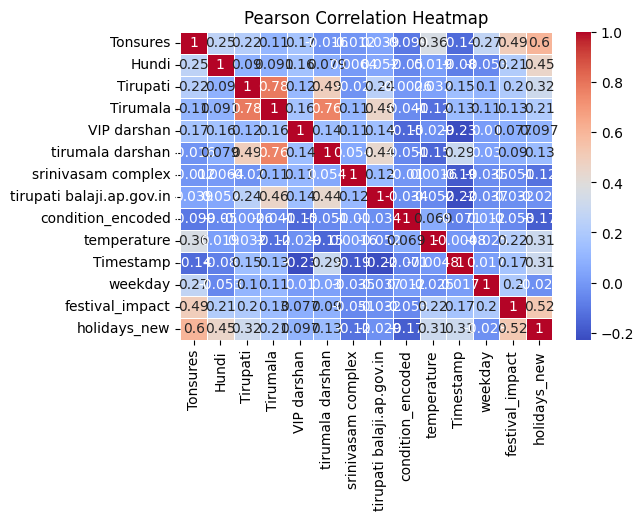

In [35]:
# Compute Pearson correlation and plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [36]:
import pandas as pd

def correlation_with_target(dataset, x_features, y_feature):
    """
    Finds features in x_features that have a correlation greater than 0.2 or less than -0.2 with y_feature.

    Parameters:
    dataset (pd.DataFrame): The input DataFrame.
    x_features (list): List of feature names to check correlation with y_feature.
    y_feature (str): The target variable to compare against.

    Returns:
    dict: Dictionary with feature pairs as keys (e.g., "PILGRIMS-TONSURES") and their correlation coefficient as values,
          where correlation > 0.2 or < -0.2 with y_feature.
    """
    col_corr = {}

    # Select only numeric columns to avoid string conversion errors
    numeric_data = dataset.select_dtypes(include='number')

    if y_feature not in numeric_data.columns:
        raise ValueError(f"Target variable '{y_feature}' not found or not numeric.")

    corr_matrix = numeric_data.corr()

    for feature in x_features:
        if feature in numeric_data.columns:
            correlation_value = corr_matrix.loc[feature, y_feature]
            if correlation_value > 0.2 or correlation_value < -0.2:
                col_corr[f"{y_feature}-{feature}"] = correlation_value

    return col_corr

# Example usage
x = ['Tonsures', 'Hundi', 'Tirupati', 'Tirumala', 'VIP darshan', 'tirumala darshan',
     'srinivasam complex', 'tirupati balaji.ap.gov.in', 'condition_encoded',
     'temperature', 'Timestamp', 'weekday', 'festival_impact', 'Piligrims_7Day_Avg','holidays_new']
y = 'Piligrims'

# Assuming df2 is your DataFrame
correlated_features = correlation_with_target(df2, x, y)

print("Targe-independent features:   coefficient correlation value")
print("-------------------------------------------------------------")
for pair, value in correlated_features.items():
    print(f"{pair}: {value:.4f}")


Targe-independent features:   coefficient correlation value
-------------------------------------------------------------
Piligrims-Tonsures: 0.6921
Piligrims-Hundi: 0.3693
Piligrims-Tirupati: 0.2906
Piligrims-Tirumala: 0.2033
Piligrims-temperature: 0.2417
Piligrims-Timestamp: 0.2323
Piligrims-weekday: 0.3941
Piligrims-festival_impact: 0.6622
Piligrims-holidays_new: 0.7620


##MODELS


##XG-BOOST MOEL

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Cross-Validation R² Scores: [0.80688441 0.75813341 0.77240896 0.77193457 0.81315666]
Mean CV R² Score: 0.7845

Model Evaluation Metrics:
Mean Absolute Error (MAE): 3636.19
Mean Squared Error (MSE): 21072552.00
Root Mean Squared Error (RMSE): 4590.48
R² Score: 0.8411


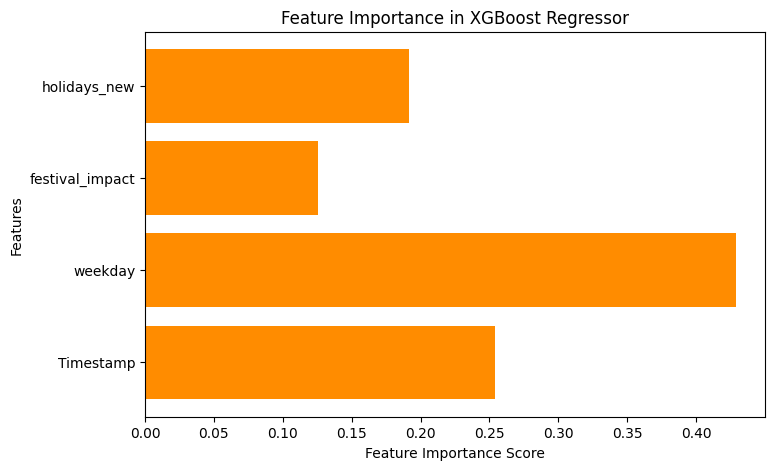

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Define features and target
features = ['Timestamp', 'weekday', 'festival_impact', 'holidays_new']
target = 'Piligrims'

# Train-test split
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for XGBoost using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=3, n_jobs=-1)

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Cross-validation score
cv = KFold(n_splits=5, shuffle=True, random_state=3)
cv_scores = cross_val_score(best_xgb, X_train_scaled, y_train, cv=cv, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")

# Predictions
y_pred = best_xgb.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Feature Importance Plot
importances = best_xgb.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='darkorange')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost Regressor")
plt.show()


##LGBMR

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 4
[LightGBM] [Info] Start training from score 68124.123288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

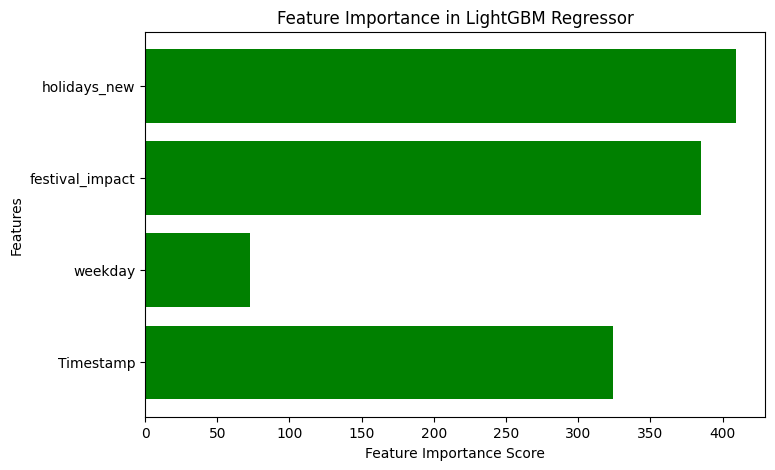

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor  # LightGBM model

# Assuming df2 is already loaded
# Define features and target
features = ['Timestamp', 'weekday', 'festival_impact','holidays_new' ]
target = 'Piligrims'

# Train-test split
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning using GridSearchCV for LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70]
}

lgbm = LGBMRegressor(random_state=3)
grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model from Grid Search
best_lgbm = grid_search.best_estimator_

# Cross-Validation Score (5-Fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=3)
cv_scores = cross_val_score(best_lgbm, X_train_scaled, y_train, cv=cv, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")

# Predictions
y_pred = best_lgbm.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance Plot
importances = best_lgbm.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='green')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in LightGBM Regressor")
plt.show()


##Random forest

Cross-Validation R² Scores: [0.76619442 0.78070411 0.77426682 0.771693   0.80751792]
Mean CV R² Score: 0.7801

Model Evaluation Metrics:
Mean Absolute Error (MAE): 3448.46
Mean Squared Error (MSE): 19508959.98
Root Mean Squared Error (RMSE): 4416.89
R² Score: 0.8529


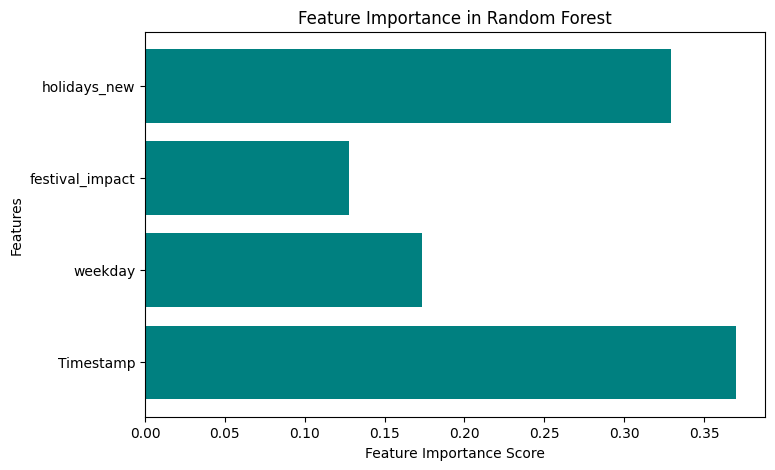

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df2 is already loaded
# Define features and target
features =['Timestamp','weekday','festival_impact','holidays_new']
target = 'Piligrims'

# Train-test split
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

# Feature Scaling (Apply only to numeric features if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=3)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model from Grid Search
best_rf = grid_search.best_estimator_

# Cross-Validation Score (5-Fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=3)
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=cv, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")

# Predictions
y_pred = best_rf.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Feature Importance Plot
importances = best_rf.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='teal')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


In [40]:
##Extra Trees Regressor

Cross-Validation R² Scores: [0.78333622 0.78087948 0.77802179 0.78781896 0.81847147]
Mean CV R² Score: 0.7897

Model Evaluation Metrics:
Mean Absolute Error (MAE): 3362.06
Mean Squared Error (MSE): 18315240.38
Root Mean Squared Error (RMSE): 4279.63
R² Score: 0.86


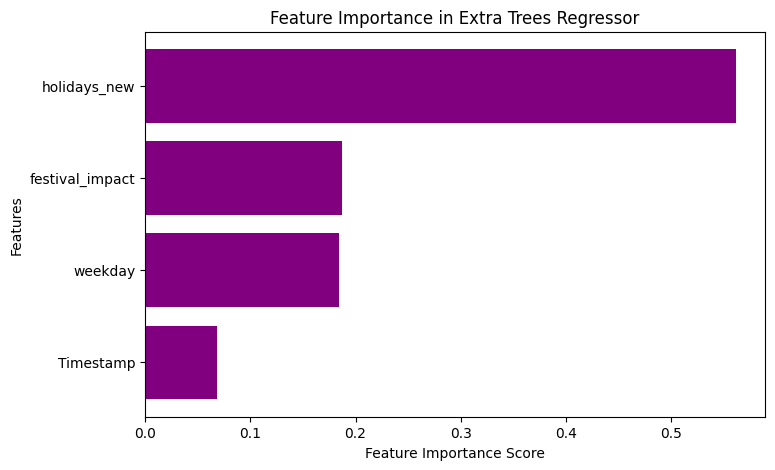

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df2 is already loaded
# Define features and target
features = ['Timestamp', 'weekday', 'festival_impact','holidays_new' ]
target = 'Piligrims'

# Train-test split
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

etr = ExtraTreesRegressor(random_state=3)
grid_search = GridSearchCV(etr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model from Grid Search
best_etr = grid_search.best_estimator_

# Cross-Validation Score (5-Fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=3)
cv_scores = cross_val_score(best_etr, X_train_scaled, y_train, cv=cv, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")

# Predictions
y_pred = best_etr.predict(X_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance Plot
importances = best_etr.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='purple')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Extra Trees Regressor")
plt.show()


##Comparison Matrix

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define features and target
features = ['Timestamp', 'weekday', 'festival_impact', 'holidays_new']
target = 'Piligrims'

# Split the dataset
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Results dictionary
results = {}

# ===================== Extra Trees =====================
etr_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
etr = ExtraTreesRegressor(random_state=3)
grid_etr = GridSearchCV(etr, etr_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_etr.fit(X_train_scaled, y_train)
best_etr = grid_etr.best_estimator_
y_pred_etr = best_etr.predict(X_test_scaled)
results["Extra Trees"] = [
    mean_absolute_error(y_test, y_pred_etr),
    np.sqrt(mean_squared_error(y_test, y_pred_etr)),
    r2_score(y_test, y_pred_etr)
]

# ===================== Random Forest =====================
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=3)
grid_rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
results["Random Forest"] = [
    mean_absolute_error(y_test, y_pred_rf),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    r2_score(y_test, y_pred_rf)
]

# ===================== XGBoost =====================
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb = XGBRegressor(random_state=3)
random_search_xgb = RandomizedSearchCV(xgb, xgb_param_dist, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=3)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
results["XGBoost (Optimized)"] = [
    mean_absolute_error(y_test, y_pred_xgb),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    r2_score(y_test, y_pred_xgb)
]

# ===================== LightGBM =====================
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70]
}
lgbm = LGBMRegressor(random_state=3)
grid_lgbm = GridSearchCV(lgbm, lgbm_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_lgbm.fit(X_train_scaled, y_train)
best_lgbm = grid_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test_scaled)
results["LightGBM"] = [
    mean_absolute_error(y_test, y_pred_lgbm),
    np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
    r2_score(y_test, y_pred_lgbm)
]

# ===================== Results Table =====================
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R²"]).T
results_df = results_df.sort_values(by="R²", ascending=False)

# Display comparison matrix
print("\n🔍 Model Comparison Matrix:\n")
print(results_df.round(4))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define features and target
features = ['Timestamp', 'weekday', 'festival_impact', 'holidays_new']
target = 'Piligrims'

# Split the dataset
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Results dictionary
results = {}

# ===================== Extra Trees =====================
etr_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
etr = ExtraTreesRegressor(random_state=3)
grid_etr = GridSearchCV(etr, etr_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_etr.fit(X_train_scaled, y_train)
best_etr = grid_etr.best_estimator_
y_pred_etr = best_etr.predict(X_test_scaled)
results["Extra Trees"] = [
    mean_absolute_error(y_test, y_pred_etr),
    np.sqrt(mean_squared_error(y_test, y_pred_etr)),
    r2_score(y_test, y_pred_etr)
]

# ===================== Random Forest =====================
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=3)
grid_rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
results["Random Forest"] = [
    mean_absolute_error(y_test, y_pred_rf),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    r2_score(y_test, y_pred_rf)
]

# ===================== XGBoost =====================
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb = XGBRegressor(random_state=3)
random_search_xgb = RandomizedSearchCV(xgb, xgb_param_dist, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=3)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
results["XGBoost (Optimized)"] = [
    mean_absolute_error(y_test, y_pred_xgb),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    r2_score(y_test, y_pred_xgb)
]

# ===================== LightGBM =====================
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70]
}
lgbm = LGBMRegressor(random_state=3)
grid_lgbm = GridSearchCV(lgbm, lgbm_param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_lgbm.fit(X_train_scaled, y_train)
best_lgbm = grid_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test_scaled)
results["LightGBM"] = [
    mean_absolute_error(y_test, y_pred_lgbm),
    np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
    r2_score(y_test, y_pred_lgbm)
]

# ===================== Results Table =====================
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R²"]).T
results_df = results_df.sort_values(by="R²", ascending=False)

# Display comparison matrix
print("\n🔍 Model Comparison Matrix:\n")
print(results_df.round(4))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 4
[LightGBM] [Info] Start training from score 68124.123288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


##validation and visualization

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 4
[LightGBM] [Info] Start training from score 68124.123288


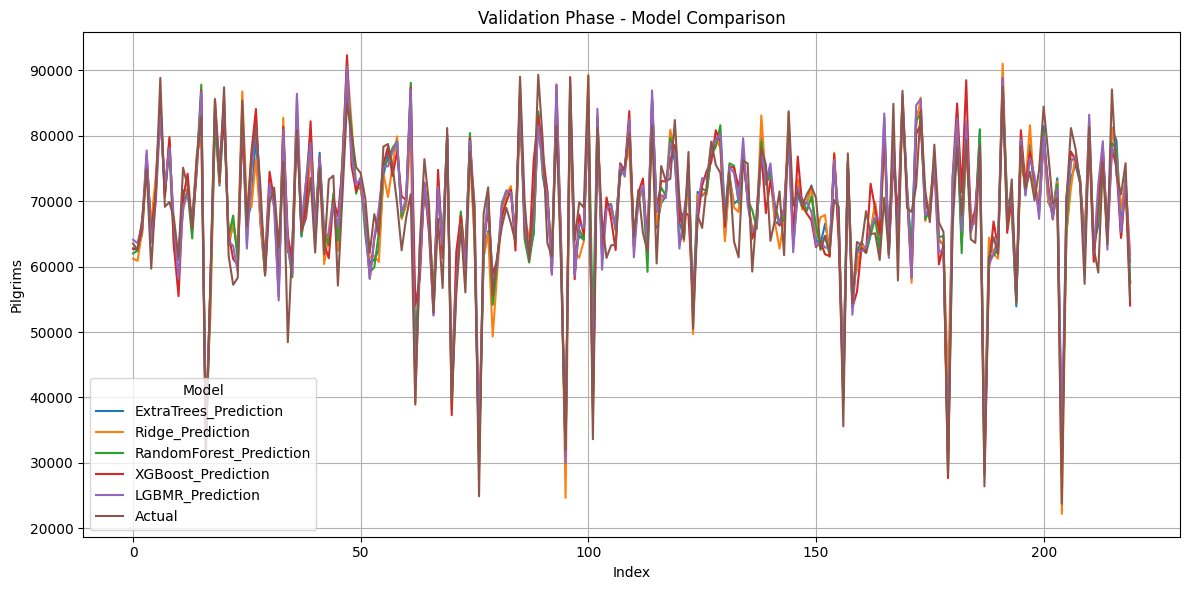

In [43]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Initialize all models
ridge = Ridge()
rf = RandomForestRegressor(random_state=3)
xgb = XGBRegressor(random_state=3)
lgbm = LGBMRegressor(random_state=3)

# Train all models
ridge.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
lgbm.fit(X_train_scaled, y_train)

# Predictions
ridge_pred = ridge.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
xgb_pred = xgb.predict(X_test_scaled)
lgbm_pred = lgbm.predict(X_test_scaled)
etr_pred = best_etr.predict(X_test_scaled)

# Combine predictions into a DataFrame
df_val = pd.DataFrame({
    'index': range(len(y_test)),
    'ExtraTrees_Prediction': etr_pred,
    'Ridge_Prediction': ridge_pred,
    'RandomForest_Prediction': rf_pred,
    'XGBoost_Prediction': xgb_pred,
    'LGBMR_Prediction': lgbm_pred,
    'Actual': y_test.values
})

# Melt the DataFrame for plotting
df_val_melted = df_val.melt(id_vars='index', var_name='Model', value_name='Pilgrims')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_val_melted, x='index', y='Pilgrims', hue='Model', palette='tab10')
plt.title("Validation Phase - Model Comparison")
plt.xlabel("Index")
plt.ylabel("Pilgrims")
plt.grid(True)
plt.tight_layout()
plt.show()
